# Tutorial for processing KOALA data with PyKOALA
## 1. Intro and generic tasks

### Import tasks

In [1]:
# Import modules
import numpy as np
# PyKOALA modules
from pykoala import __version__
print("Running pyKOALA version: ", __version__)

from pykoala.instruments.koala_ifu import koala_rss

Running pyKOALA version:  0.14.2+17.g94b7131.dirty


## Prepare the data 
Read RSS files already pre-processed with 2dFdr

In [2]:
aaomega_arms = {'blue': 1, 'red': 2}
aaomega_gratings = {'blue': "580V", 'red': "385R"}

# # Set the folder with the data
path_to_data = './data'
import os
os.system('pwd')

# # Set the date for AAT data files
date="27feb"

# # Choose which arm of the spectrograph is going to be used, it is best starting with the RED grating
arm = 'red'

# # If using name of the gratings as name of folder
path_to_filename = f"{path_to_data}/{aaomega_gratings[arm]}"

# # Check the data that we have in folder path_to_filename using task "list_koala_fits_files_in_folder()"
#list_koala_fits_files_in_folder(path_to_data)

/home/pcorchoc/Develop/koala/tutorials


## Read rss file

The task koala_rss(filename) creates a KOALA `RSS` object.

In [3]:
# # Set obs_number to be read
obs_number = 28 #31-36  galaxy, 28, 29, 30 star 2, 25,26,27 star 1

# # Set variable "filename" just with the info of the file (it does not include the path in this example)
filename = f"{date}{aaomega_arms[arm]}00{obs_number}red.fits"        

# run28_red = koalaRSS(filename,                         # Name of the file, it could including all full path
#                      path = path_to_data,          # Path to the file (optional, default=None)
#                      rss_object_name = "run28_red",    # Name of the rss object to be created (optional, default=None)
#                      verbose = True,                   # Print in screen what it is happening (optional, default=False)
#                      plot = True)                      # Plot any plot that appears in the process (optional, default=False)

run28_red = koala_rss(os.path.join(path_to_data, filename))

[pykoala] 2024/08/24 16:32|INFO> 
> Reading KOALA RSS file 27feb20028red.fits
[pykoala] 2024/08/24 16:32|INFO> No. of fibres in this RSS =1000
No. of good fibres = 986
No. of bad fibres = 14
[pykoala] 2024/08/24 16:32|INFO> Bad fibres = [109, 110, 235, 424, 574, 607, 675, 714, 721, 722, 723, 793, 950, 951]


  'Angstroms' -> 'Angstrom'. [astropy.wcs.wcs]


## Visualize the data content of an RSS

The method `plot_rss_image` allows to plot any quantity related to a given RSS

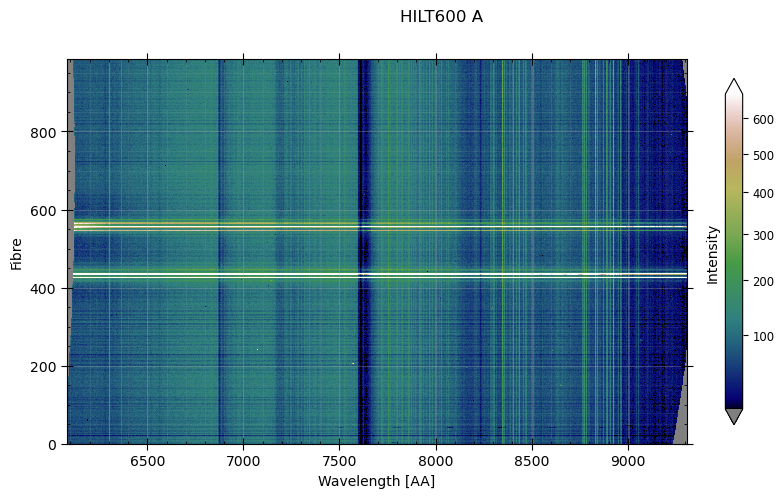

In [4]:
# Plot the RSS intensity by default
fig = run28_red.plot_rss_image()

/home/pcorchoc/Develop/koala/src/pykoala/data_container.py:436: RuntimeWarning: invalid value encountered in sqrt
  return self.intensity / self.variance**0.5


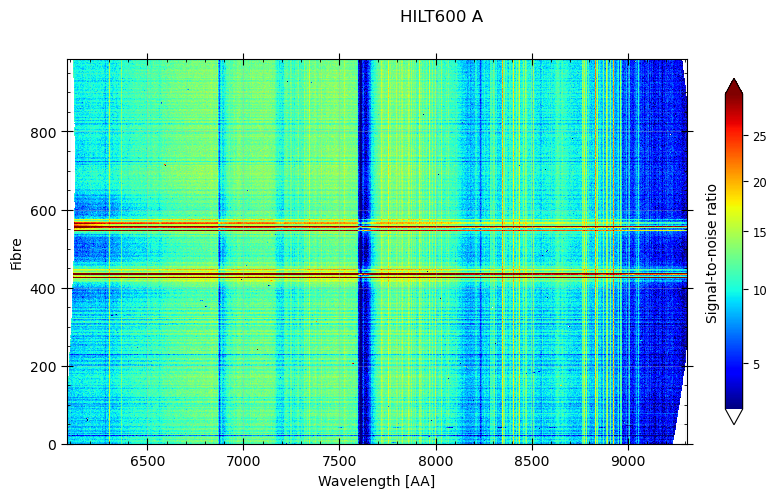

In [5]:
# Plot the SNR
fig = run28_red.plot_rss_image(run28_red.snr, data_label="Signal-to-noise ratio",
                               cmap_args=dict(cmap='jet'))

You can also visualize the quality control mask of the RSS (or any data container)

Label - Integer value (2^bitmask) pairs of the current mask: 
 {'BAD': (2, 'Generic bad pixel flag'), 'NEGATIVE': (4, 'Pixels with negative values'), 'BRIGHT': (8, 'Very bright pixels')}


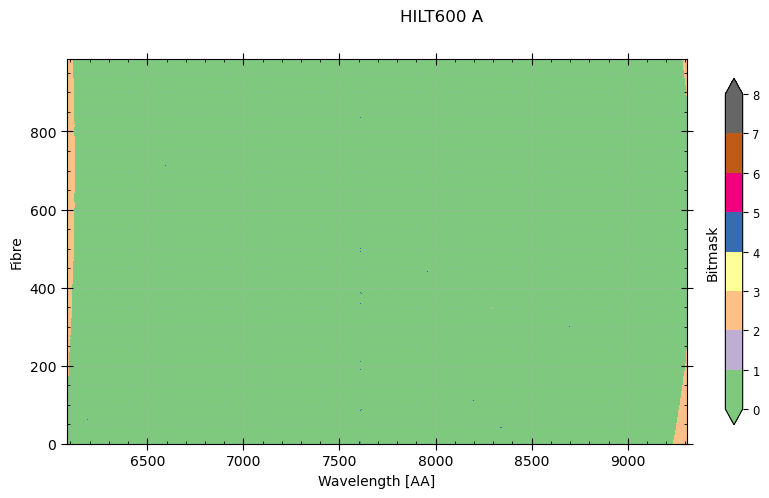

In [6]:
# Fill the existing mask with different criteria
run28_red.mask.flag_pixels(~np.isfinite(run28_red.intensity), "BAD")
run28_red.mask.flag_pixels(run28_red.intensity < 1, "NEGATIVE", "Pixels with very little counts")
run28_red.mask.flag_pixels(run28_red.intensity > 1e4, "BRIGHT", "Very bright pixels")

# Plot the bitmask
fig = run28_red.plot_mask()
print("Label - Integer value (2^bitmask) pairs of the current mask: \n", run28_red.mask.flag_map)

## Check structure of the rss object

In [7]:
run28_red.wavelength  # Wavelength vector
run28_red.intensity   # Intensity in the form run28_red.intensity[fibre_index,wavelength_index]
run28_red.variance    # Variance in the form run28_red.variance[fibre_index,wavelength_index]
run28_red.info        # Dictionary with general info of the rss

{'name': 'HILT600 A',
 'exptime': 120.0,
 'fib_ra': array([101.30856697, 101.30856639, 101.30856581, 101.30856523,
        101.30856465, 101.30826361, 101.30826419, 101.30826477,
        101.30826535, 101.30826592, 101.30796546, 101.30796488,
        101.3079643 , 101.30796372, 101.30796315, 101.3076621 ,
        101.30766268, 101.30766326, 101.30766384, 101.30736279,
        101.30736395, 101.30736337, 101.30766442, 101.30736222,
        101.30736164, 101.30706059, 101.30706117, 101.30706175,
        101.30706233, 101.30706291, 101.30676244, 101.30676186,
        101.30676129, 101.30676071, 101.30676013, 101.30645908,
        101.30645966, 101.30646024, 101.30646082, 101.3064614 ,
        101.30616093, 101.30616036, 101.30615978, 101.3061592 ,
        101.30615862, 101.30585758, 101.30585816, 101.30585873,
        101.30585931, 101.30585989, 101.30555943, 101.30555885,
        101.30555827, 101.30555769, 101.30555711, 101.30525607,
        101.30525665, 101.30525723, 101.3052578 , 101

In [8]:
print(run28_red.wavelength)

[6080.9588623  6082.53404462 6084.10922693 ... 9302.20669104 9303.78187335
 9305.35705566]


In [9]:
print(run28_red.intensity)

[[76.03494  85.01237  71.432556 ...       nan       nan       nan]
 [62.802193 51.24656  48.788467 ...       nan       nan       nan]
 [69.09473  70.2224   75.24431  ...       nan       nan       nan]
 ...
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]]


In [10]:
print("Name of this rss :",run28_red.info["name"])        # Name of the observation, as taken at the telescope and included in fits file
print("Exposition time  :",run28_red.info["exptime"])     # Exposition time in s  
print("Airmass          :",run28_red.info["airmass"])     # Airmass
#print(run28_red.info["fib_ra"])     # Absolute RA  position of fibres in sky (lists 986 values), in degrees
#print(run28_red.info["fib_dec"])    # Absolute DEC position of fibres in sky (lists 986 values), in degrees

Name of this rss : HILT600 A
Exposition time  : 120.0
Airmass          : 1.2271963296391781


## Plotting spectra

For plotting a spectrum, we can use task get_spectrum(data_container, fibre=fibre, r=False, **kwargs)

In this example, we will plot the spectrum of the brightest fibre (the title of the plot will tell us its number), also indicating with vertical dashed lines valid_wave_min and valid_wave_max, as well as H-alpha in this star, and shading the region with the strong telluric absorption at ~7600 A.

In [11]:
from pykoala.plotting.rss_plot import get_spectrum, plot_wavelength
from pykoala.plotting.quick_plot import quick_plot

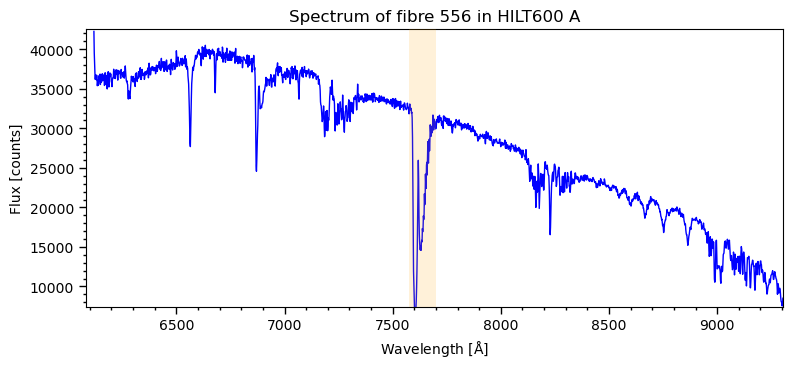

In [12]:
sorted_fibres = run28_red.get_spectra_sorted()

get_spectrum(run28_red,
             fibre = sorted_fibres[-1],       # Brightest fibre
             r = False,                                                 # The spectrum will NOT be returned
             plot=True,                                                 # Plot the spectrum
             axvspan = [[7575,7700]],                                   # Many options in quick_plot go in **kwargs
             )

We can also plot or obtain a spectrum combining several fibres using plot_combined_spectrum(rss, list_spectra=None, median=False, r=False, **kwargs).

In this example, we add (using median = False) the 10 brightest fibres, and save it in bright_spectrum

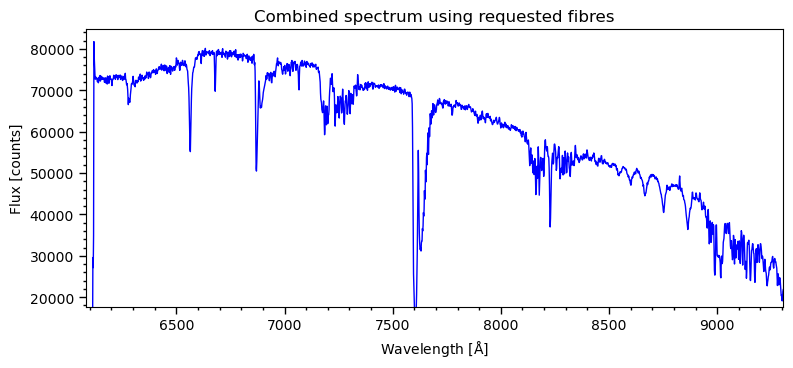

In [13]:
bright_spectrum = get_spectrum(run28_red,
                               list_fibre=sorted_fibres[-10:],  # List of fibres to be combined
                               median=False,                                              # If median = False, we sum all flux
                               plot = True,                                               # Plot it
                               r=True)                                                    # The spectrum WILL be returned

### Using quick_plot()

The task get_spectrum() uses the generic plotting task quick_plot().

This task has plenty of options. Check full info in the description of the task.

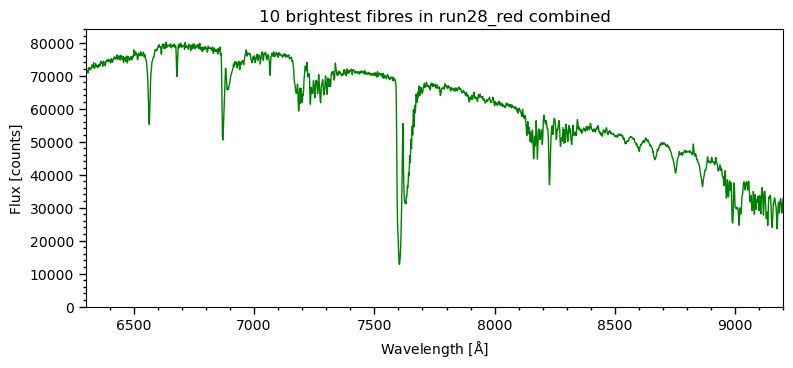

In [14]:
wr = run28_red.wavelength
#bright_spectrum = run28_red.intensity[run28_red.koala.integrated_fibre_sorted[-1]]

quick_plot(wr,                                                   # x vector (it can be a list matching the y vectors)
          bright_spectrum,                                      # y vector (or vector list using [spec1, spec2,...]
          ptitle="10 brightest fibres in run28_red combined",   # Title of the plot
          color = "green",                                      # color (or vector with colors matching y vectors)
          xmin =6300, xmax=9200,                                # xmin and xmax: min x and max x to plot
          ymin=0, ymax = 84000,                                 # ymin and ymax: min y and max y to plot (check extra_y = 0)
          extra_y = 0                                           # By default, quick_plot shows 2-98 percentiles + an extra_y = 0.1
          ) 

### Cuts at a fixed wavelength

For showing a plot in the fibre direction, we can use plot_wavelength(rss, wavelength, r = False, **kwargs)

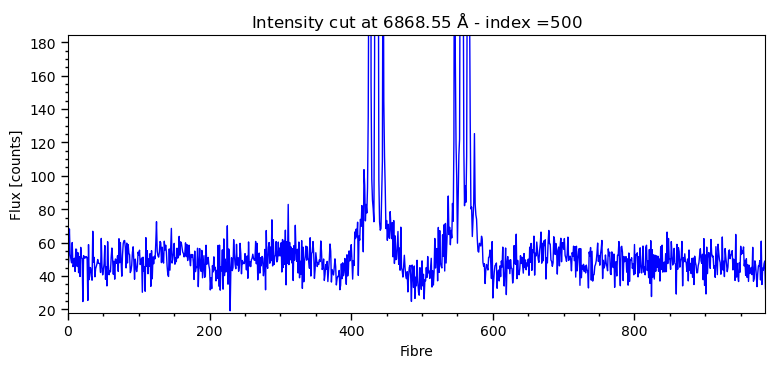

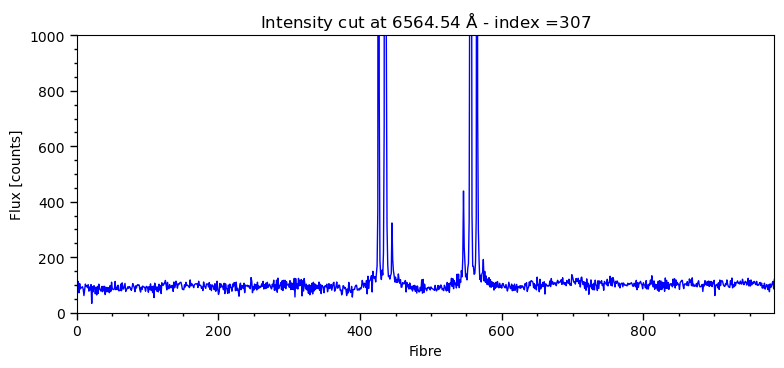

In [15]:
plot_wavelength(run28_red, 500, r=False)          # If wavelength is integer and < wavelength[0], it is an index 
plot_wavelength(run28_red, 6563,                  # This plots the cut closest to 6563, it is in index 307 as says in plot title 
                r=False,
                ymin=0, ymax=1000, extra_y=0)     # Additional plotting adjustments for quick_plot() as kwargs 

 ## Plotting the RSS image

It is possible to plot only a subregion:

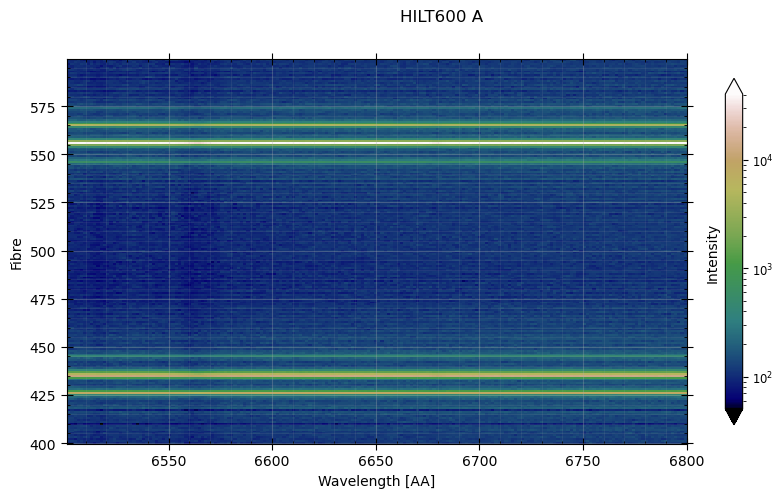

In [16]:
fig = run28_red.plot_rss_image(wavelength_range=[6500, 6800], fibre_range=[400, 600],
                               cmap_args={'norm': 'LogNorm'})

 ## Plotting the KOALA RSS map

The task rss_map() plots a map using the integrated value of each fibre. Many options in task:

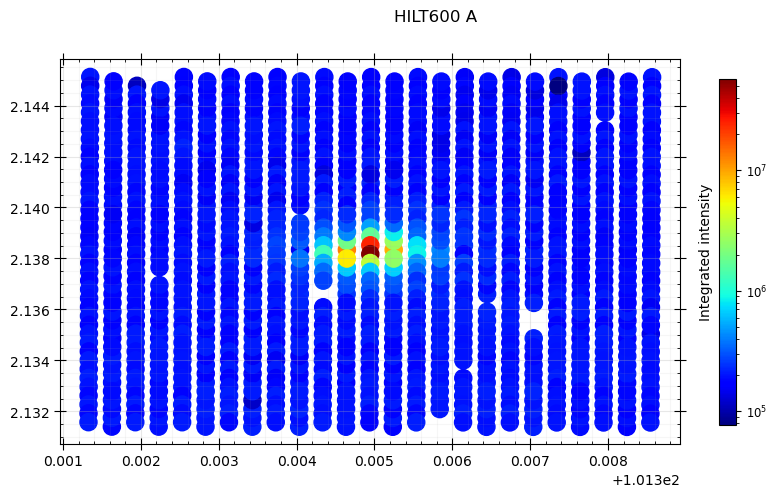

In [17]:
fig = run28_red.plot_plot_fibres(cmap_args={'cmap': 'jet', 'norm': 'LogNorm'})

# Processing RSS files  - DO NOT RUN FROM HERE !!!

RSS files for KOALA in PyKOALA can easily be processed using ONLY ONE task: process_koala_rss(). This task will perform, in order and as requested:

1. Read the file using koalaRSS, creating .koala object and creating mask
2. Applying the throughput correction (T)
3. Correcting CCD defects (for removing some nans) (C)
4. Small wavelength shift correction (W)
5. Atmospheric extinction correction (X)
6. Telluric correction (red arm) (U)
7. Sky subtraction (several methods included) (S)
8. Check negative sky (over-substracting sky if using self sky spectrum) (N)
9. Emission line identification (E)
10. Cleaning sky residuals (R)
11. Cleaning extreme negative values (R)
12. Cleaning bright cosmic rays not deleted by 2dFdr (R)
13. Save your processed RSS data in fits files.

The details of the processing RSS for science or calibration files are included in tutorial 3. 

Below we provide the info of the most important parameters. 
NOTE: As we have not derived any calibration here, only those procedures that do not need them are True, and of course the resulting RSS will not be good (mainly as we have not applied the throughput).

```python
run28_red=process_koala_rss(rss_object_name="run28_red",                          # Name of the object to be created
                            rss=run28_red,                                        # rss object, if it has been already created
                            #filename=filename,                                   # name of the .fits file
                            #path = path_to_filename,                             # path to the fits file
                            #calibration_night = calibration_night_385R,          # Object with the calibration of the night, if obtained
                            #save_rss_to_fits_file ="clean",                      # save fits file adding "clean" at the end, e.g. "27feb20028red_clean.fits"
                            apply_throughput = False,                             # (T)
                            #throughput=throughput_2D_red,                        # Throughput correction object, included in calibration_night_385R
                            correct_ccd_defects = True,                           # (C)
                            fix_wavelengths = False,                              # (W)
                            #wavelength_shift_correction = wavelength_shift_correction,   # wavelength shift correction object, included in calibration_night_385R 
                            correct_for_extinction = True,                        # (X)
                            apply_telluric_correction=False,                      # (U)
                            #telluric_correction = telluric_correction,           # Telluric correction object, included in calibration_night_385R
                            sky_method = "self",                                  # Sky method to use, in this case using fibres from rss itself
                            correct_negative_sky=True,                            # (N)
                            id_el = False,                                        # (E)  
                            big_telluric_residua_correction = False,              # (R)
                            telluric_residua_at_6860_correction = False,          # (R)
                            correct_extreme_negatives = True,                     # (R)
                            percentile_min_for_extreme_negatives = 0.01,          # As it says
                            clean_cosmics=True,                                   # (R) 
                            only_plot_cosmics_cleaned = True,                     # As it says  

                            verbose_counter = False,                              # Counter does not work on Jypiter
                            plot_final_rss=True, warnings=True, plot = True, verbose = True        # This plots and verbose everything
                            #plot_final_rss=False, warnings=False, plot = False, verbose = False   # This does not plot or verbose (default)
                            )
```                            

# process_koala_rss() with all the options

```python
# Set obs_number to be read
obs_number = 32 #31-36  galaxy He2-10

# Set variable "filename" just with the info of the file (it does not include the path in this example)
filename = f"{date}{aaomega_arms[arm]}00{obs_number}red.fits"     

run32_red=process_koala_rss(rss_object_name="run32_red",                          # Name of the object to be created
                            filename=filename,                                    # name of the .fits file to use
                            path = path_to_filename,                              # path to fits file
                            calibration_night = calibration_night_385R,           # Object with the calibration of the night                        
                            apply_throughput = True,                              # (T)  
                            #throughput=throughput_2D_red,                        # Throughput object, included in calibration_night_385R
                            correct_ccd_defects = True,                           # (C)
                            fix_wavelengths = True,                               # (W)
                            #wavelength_shift_correction = wavelength_shift_correction,   # wavelength shift correction object, included in calibration_night_385R 
                            correct_for_extinction = True,                        # (X)
                            apply_telluric_correction=True,                       # (U)
                            #telluric_correction = telluric_correction,           # Telluric correction object, included in calibration_night_385R
 
                            sky_method = "selffit",                                         # (S) Using the same rss and fitting Gaussians to skylines in each fibre
                            n_sky = 25,                                                     # Using the 25 fibres with lowest intensity...          
                            sky_wave_min=6960,                                              # ... between 6960 ..
                            sky_wave_max=7220,                                              # ... and 7220
                            bright_emission_lines_to_substract_in_sky = [6584],             # List with bright emission lines to substract in sky, typically H-alpha
                            list_of_skylines_to_fit_near_bright_emission_lines = [[6577]],  # List with lists of adjacent skylines we have to consider close to bright emission lines
                            fix_edges = True,                                               # Use information in the rss to fix the red/blue edges in sky spectrum if needed
 
                            correct_negative_sky = True,                  # (N) Check fibres for negative sky
                            id_el = True,                                 # (E) Identify emission lines in combined spectrum of rss
                            big_telluric_residua_correction = True,       # (R) # Fix residua of the big telluric absorption at ~7600 A 
                            correct_extreme_negatives = True,             # (R) Correct for extreme negatives
                            percentile_min_for_extreme_negatives = 0.05,  # Percentile below which extreme negative will be corrected
                            clean_cosmics = True,                         # (R) Clean cosmics
                            max_number_of_cosmics_per_fibre = 15,         # Max number of cosmics to clean per fibre or wavelength, if more than this it does not correct anything.
                            only_plot_cosmics_cleaned = True,             # The only plot that this task will provide, default is False, but use True for minimizing plotting
                              
                            verbose_counter = False,                                               # Counter does not work on Jypiter
                            plot_final_rss=True, warnings=False, plot = True, verbose = True       # This plots and verbose everything
                            #plot_final_rss=False, warnings=False, plot = False, verbose = False   # This does not plot or verbose (default)
                            )
```